In [1]:
import tensorflow as tf
import numpy as np
import glob
import os
from astropy.io import fits
import importlib.util
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_module(path):
    spec = importlib.util.spec_from_file_location("module.name", path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module

def load_arch(arch_path, bands):
    arch = load_module(arch_path)
    nn = arch.CNN()

    g = tf.Graph()
    with g.as_default():
        nn.create_architecture(bands=bands)
    return g, nn

In [3]:
graph, nn = load_arch("arch_views.py", 4)

In [4]:
def load_backup(sess, graph, backup):
    with graph.as_default():
        saver = tf.train.Saver()
        saver.restore(sess, backup)

In [5]:
sess = tf.Session(graph=graph)
os.system('cd trained_variables/ground_based/ && 7za e views.7z.001')
load_backup(sess, graph, 'trained_variables/ground_based/views')

download the training set on [this page](http://metcalf1.bo.astro.it/blf-portal/gg_challenge.html)
then run the `fits_to_npz.py` script to generate npz files

In [6]:
files = sorted(glob.glob('../LE-data/GroundBasedTraining/npz/*.npz'))[:3000]

In [7]:
concat = []
for i in range(0, len(files), 50):
    images = [np.load(x)['image'] for x in files[i: i + 50]]
    images = nn.prepare(np.array(images))
    res = sess.run(nn.embedding_input, feed_dict={nn.tfx: images})
    concat.append(res)
    print(i, end=' ')
concat = np.array(concat).reshape((3000, 4))

0 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050 2100 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800 2850 2900 2950 

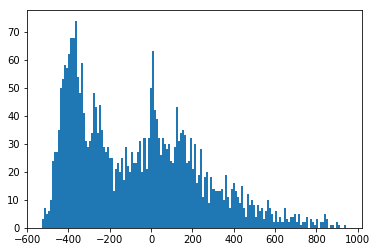

In [8]:
plt.hist(concat[:,0], bins=150);

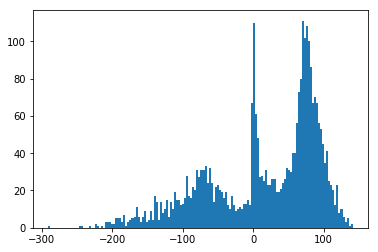

In [9]:
plt.hist(concat[:,1], bins=150);

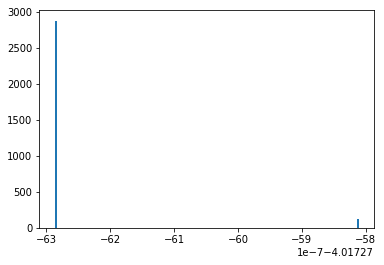

In [10]:
plt.hist(concat[:,2], bins=150);

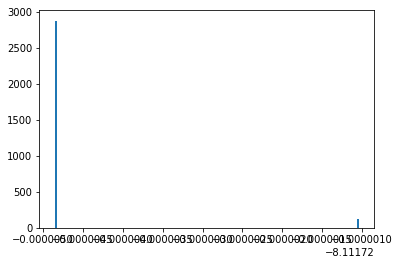

In [11]:
plt.hist(concat[:,3], bins=150);